In [3]:
import jax; import jax.numpy as jnp
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def plot_gradient_field(x_min, x_max, y_min, y_max, fn_scalar, ax):
    grad_x = jax.vmap(jax.vmap(jax.grad(fn_scalar, argnums=0)))
    grad_y = jax.vmap(jax.vmap(jax.grad(fn_scalar, argnums=1)))

    fn_grad_field = lambda x, y: (grad_x(x, y), grad_y(x, y))
    
    plot_vector_field(x_min, x_max, y_min, y_max, fn_grad_field, ax)
    
    
def plot_vector_field(x_min, x_max, y_min, y_max, fn_field, ax):
    x = jnp.linspace(x_min, x_max, 20)
    y = jnp.linspace(y_min, y_max, 20)
    xx, yy = jnp.meshgrid(x, y)

    u, v = fn_field(xx, yy)

    ax.set_aspect('equal')
    ax.quiver(xx, yy, u, v)    

Plot the gradient field of function $x^2 * y - y^3$.

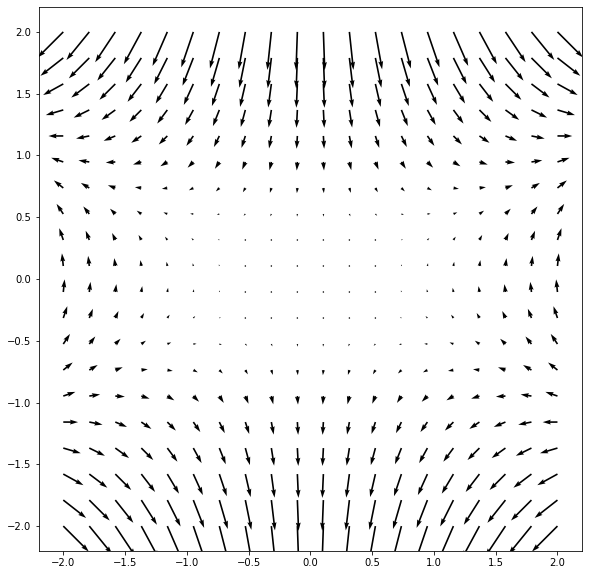

In [11]:
fn = lambda x, y: x**2 * y - y**3

fig, ax = plt.subplots(figsize=(10, 10))
plot_gradient_field(-2, 2, -2, 2, fn, ax)